# Trabalho de casa 01: Método dos vizinhos mais próximos ($k$-NN)

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynb

Caso você opte por resolver as questões de "papel e caneta" um editor de $\LaTeX$ externo, o inclua no final da versão pdf do 'ipynb'.

## Exercícios computacionais

**Exercício 1.** O código abaixo carrega o dataset MNIST, que consiste em imagens de dígitos entre $0$ e $9$. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 5) e reporte a acurácia para cada valor de $k$. Lembre que a acurácia é o percentual de amostras classificadas corretamente. Notavelmente, as entradas do MNIST tem dimensão relativamente alta (64). Plote uma imagem com a variância amostral dos pixels das imagens e comente. Também mostre as imagens classificadas de maneira errônea e comente.

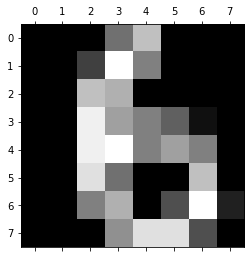

In [1]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset():
    features_train: np.ndarray 
    features_test: np.ndarray  
    labels_train: np.ndarray   
    labels_test: np.ndarray

# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))

# Notice that, in the MNIST dataset, the images are already flattened, i.e., are
# represented as 64-dimensional vectors, not as 8 by 8 matrices.

# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[0].reshape(8, 8))
plt.gray()
plt.show()

In [2]:
X_test = mnist.features_test
X_train = mnist.features_train
y_test = mnist.labels_test
y_train = mnist.labels_train

In [3]:
def most_common(lst):
    '''Returns the most common element in a list'''
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    '''Euclidean distance between a point  & data'''
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KNN():
    def __init__(self, k, X_train, y_train, dist_metric=euclidean):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train
        self.dist_metric = dist_metric
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[1:self.k+1])   # [:self.k]
            
        return np.array(list(map(most_common, neighbors)))
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [4]:
accuracies = []
ks = range(1, 6)
for k in ks:
    knn = KNN(k, X_train, y_train, euclidean)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
for k in ks:
    print(f"A acurácia para k = {k} foi de {accuracies[k-1]*100}%")  

A acurácia para k = 1 foi de 98.44444444444444%
A acurácia para k = 2 foi de 98.66666666666667%
A acurácia para k = 3 foi de 98.88888888888889%
A acurácia para k = 4 foi de 98.88888888888889%
A acurácia para k = 5 foi de 99.11111111111111%


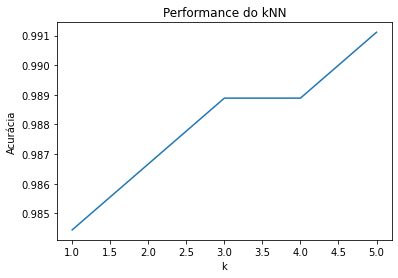

In [5]:
accuracies = []
ks = range(1, 6)
for k in ks:
    knn = KNN(k, X_train, y_train, euclidean)
    accuracy_test = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy_test)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Acurácia",
       title="Performance do kNN")
plt.show()

In [6]:
lista_i = []
lista_k = []
for k in range(1, 6):
    classify1 = KNN(k, X_train, y_train, euclidean)
    predictions = classify1.predict(X_test)
    for i in range(len(mnist.labels_test+1)):
        if predictions[i] != y_test[i]: 
            lista_i.append(i)
            lista_k.append(k)
            print (k, i,"Diferente")

1 52 Diferente
1 71 Diferente
1 133 Diferente
1 144 Diferente
1 159 Diferente
1 204 Diferente
1 383 Diferente
2 71 Diferente
2 133 Diferente
2 144 Diferente
2 159 Diferente
2 234 Diferente
2 279 Diferente
3 71 Diferente
3 144 Diferente
3 159 Diferente
3 249 Diferente
3 339 Diferente
4 71 Diferente
4 144 Diferente
4 159 Diferente
4 249 Diferente
4 279 Diferente
5 71 Diferente
5 159 Diferente
5 249 Diferente
5 339 Diferente


In [7]:
difference_dict = {}

for key, value in zip(lista_k, lista_i):
    if key not in difference_dict:
        difference_dict[key]=[value]
    else:
        difference_dict[key].append(value)

print(difference_dict)

{1: [52, 71, 133, 144, 159, 204, 383], 2: [71, 133, 144, 159, 234, 279], 3: [71, 144, 159, 249, 339], 4: [71, 144, 159, 249, 279], 5: [71, 159, 249, 339]}


In [8]:
for k in range(1, 6):
    classify1 = KNN(k, X_train, y_train, euclidean)
    predictions = classify1.predict(X_test)
    for i in difference_dict[k]:
        print(f"Usando k = {k} e i = {i}, o valor predito foi: " 
                      f"{predictions[i]}", 
                    f"e o valor verdadeiro é: {mnist.labels_test[i]}")
    print('\n')  

Usando k = 1 e i = 52, o valor predito foi: 3 e o valor verdadeiro é: 9
Usando k = 1 e i = 71, o valor predito foi: 9 e o valor verdadeiro é: 5
Usando k = 1 e i = 133, o valor predito foi: 9 e o valor verdadeiro é: 7
Usando k = 1 e i = 144, o valor predito foi: 8 e o valor verdadeiro é: 9
Usando k = 1 e i = 159, o valor predito foi: 4 e o valor verdadeiro é: 9
Usando k = 1 e i = 204, o valor predito foi: 1 e o valor verdadeiro é: 8
Usando k = 1 e i = 383, o valor predito foi: 9 e o valor verdadeiro é: 8


Usando k = 2 e i = 71, o valor predito foi: 9 e o valor verdadeiro é: 5
Usando k = 2 e i = 133, o valor predito foi: 9 e o valor verdadeiro é: 7
Usando k = 2 e i = 144, o valor predito foi: 8 e o valor verdadeiro é: 9
Usando k = 2 e i = 159, o valor predito foi: 4 e o valor verdadeiro é: 9
Usando k = 2 e i = 234, o valor predito foi: 9 e o valor verdadeiro é: 5
Usando k = 2 e i = 279, o valor predito foi: 9 e o valor verdadeiro é: 3


Usando k = 3 e i = 71, o valor predito foi: 9 e o 

In [9]:
difference_dict.values()

dict_values([[52, 71, 133, 144, 159, 204, 383], [71, 133, 144, 159, 234, 279], [71, 144, 159, 249, 339], [71, 144, 159, 249, 279], [71, 159, 249, 339]])

In [10]:
for i in difference_dict.values():
    print(i)

[52, 71, 133, 144, 159, 204, 383]
[71, 133, 144, 159, 234, 279]
[71, 144, 159, 249, 339]
[71, 144, 159, 249, 279]
[71, 159, 249, 339]


In [11]:
lista_dic =[] # create empty list
for val in difference_dict.values(): 
    if val in lista_dic: 
        continue 
    else:
        lista_dic.append(val)

print(lista_dic)

[[52, 71, 133, 144, 159, 204, 383], [71, 133, 144, 159, 234, 279], [71, 144, 159, 249, 339], [71, 144, 159, 249, 279], [71, 159, 249, 339]]


In [12]:
res=()
for item in lista_dic:
    res = list(set(res) | set(item))
res.sort(reverse=False)

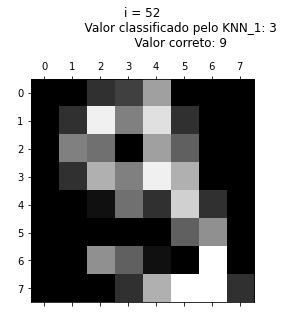

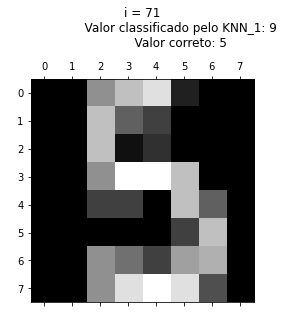

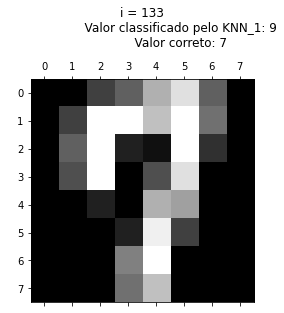

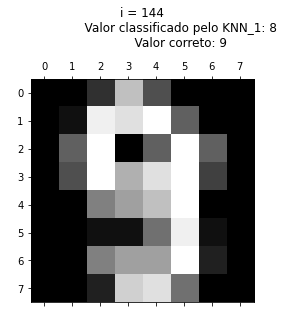

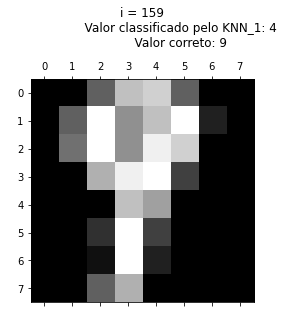

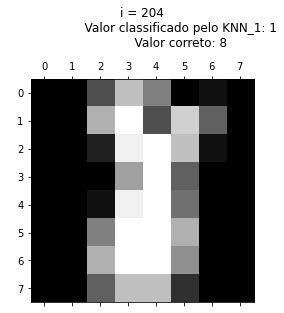

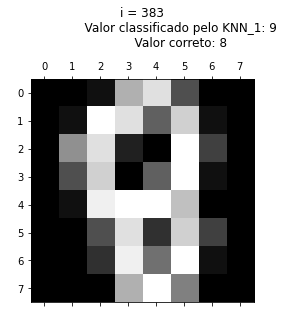

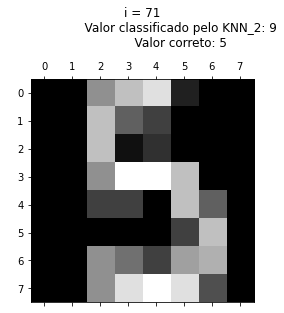

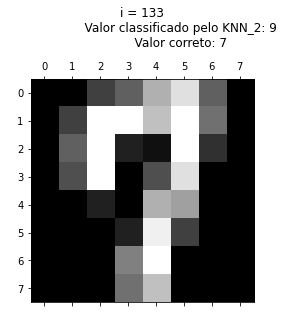

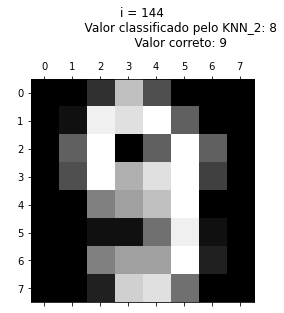

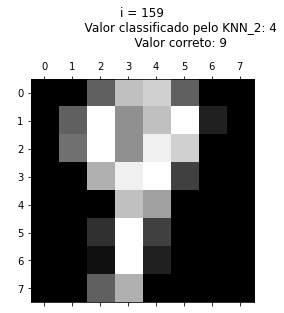

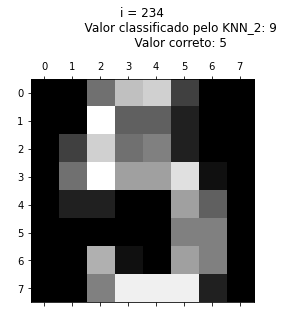

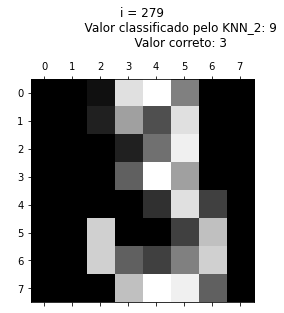

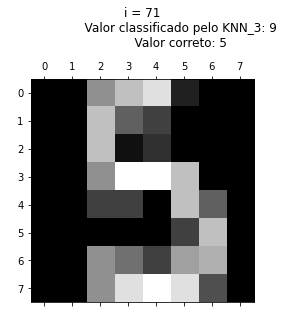

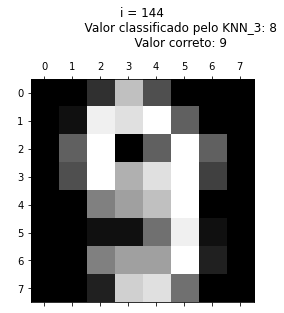

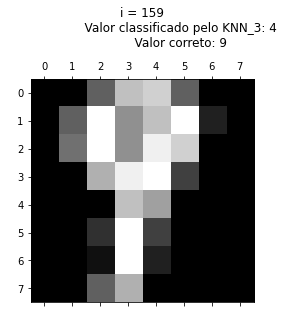

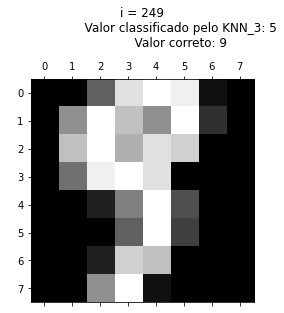

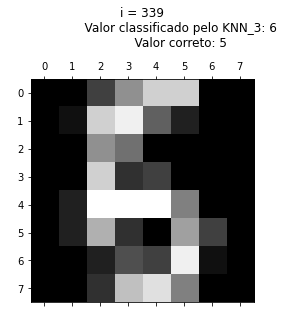

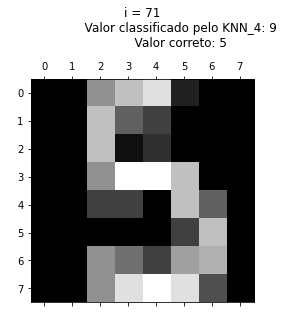

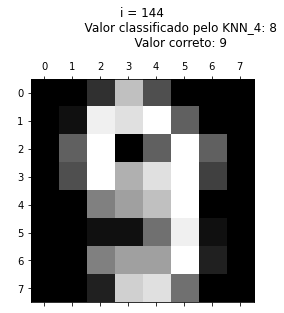

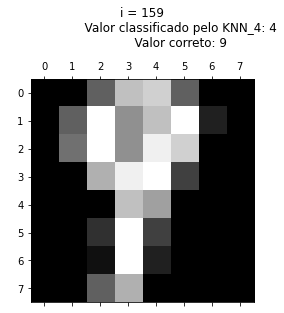

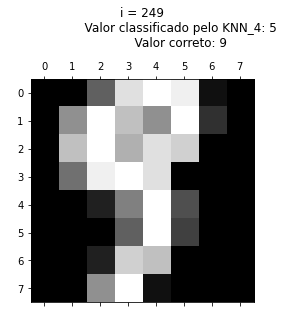

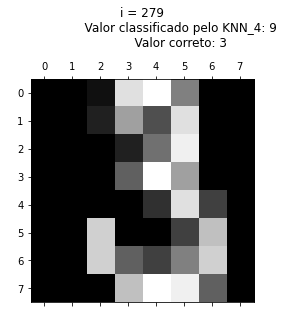

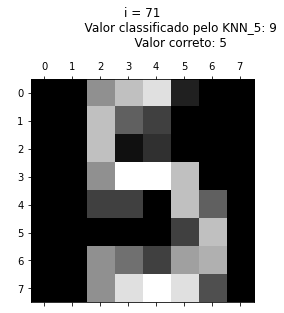

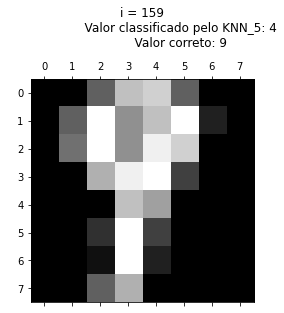

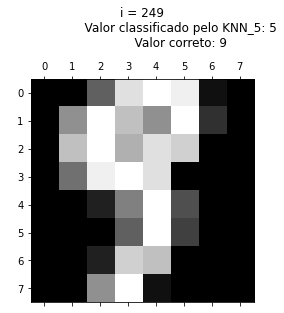

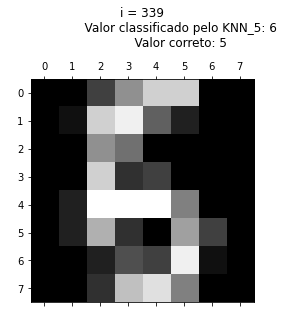

In [13]:
for k in difference_dict.keys():
    classify_new = KNN(k, X_train, y_train, euclidean)
    predictions_new = classify_new.predict(X_test)
    for i in lista_dic[k-1]:
        #print(f"k = {k}, i={i}")
        plt.matshow(mnist.features_test[i].reshape(8, 8))
        plt.title(f"""i = {i}
                    Valor classificado pelo KNN_{k}: {predictions_new[i]}
                    Valor correto: {mnist.labels_test[i]}
                    """)
        plt.show()

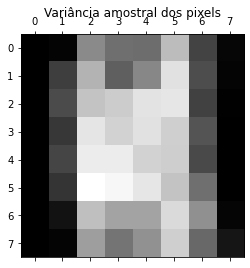

In [14]:
n_px = len(mnist.features_train[0])
var_px = np.zeros(n_px)

for i, px_group in enumerate(zip(*mnist.features_train)):
    var = np.var(px_group)
    var_px[i] = var

plt.matshow(var_px.reshape(8,8))
plt.gray()
plt.title("Variância amostral dos pixels")
# Seria interessante tentar classificar a imagem resultante
plt.show()

Observando a variância amostral dos pixels, é possível notar que a variância é bem maior no centro do que nas bordas da imagem, o que é fácil de ser explicado, dado que as imagens estão sempre posicionadas no centro da imagem, raramente "beirando" as laterais, além do que a maior varição do formato entre os números será na região central, o que explica a variância maior nessa área.

**Exercício 02.** O código abaixo carrega o dataset "two moons", que consiste de amostras bidimensionais divididas em duas classes. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 10). Plote a superfície de decisão para cada valor de $k$. Como $k$ influencia na suavidade dessas superfícies?

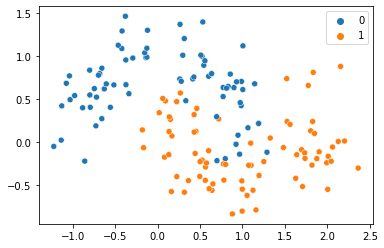

In [15]:
# Import dataset and separate train/test subsets
moon = Dataset(*train_test_split(
    *make_moons(n_samples=200, shuffle=True, noise=0.25, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
plt.show()

In [16]:
X_test_moon = moon.features_test
X_train_moon = moon.features_train
y_test_moon = moon.labels_test
y_train_moon = moon.labels_train

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


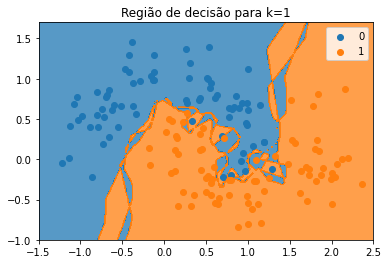

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


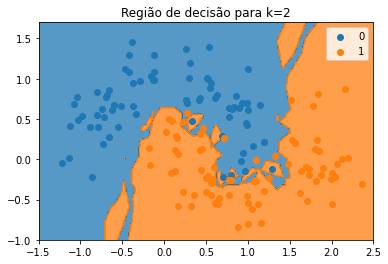

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


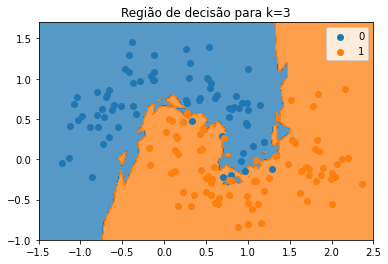

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


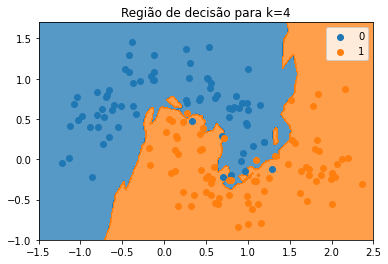

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


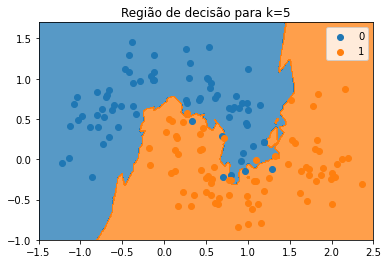

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


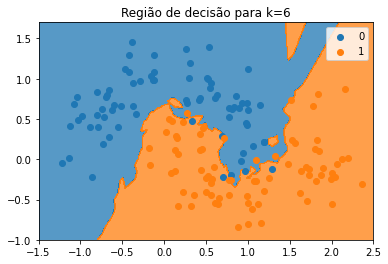

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


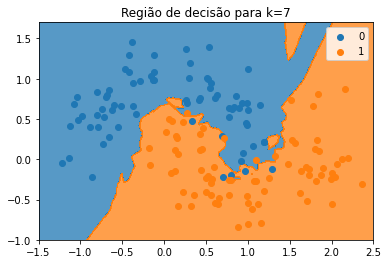

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


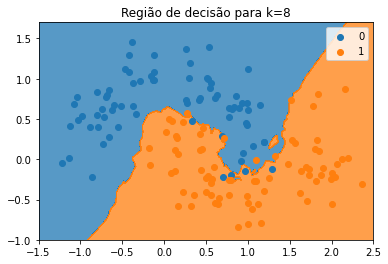

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


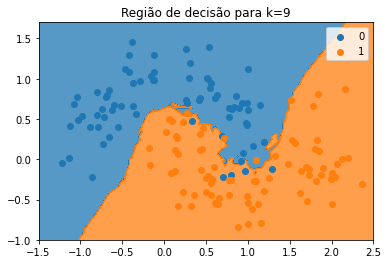

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


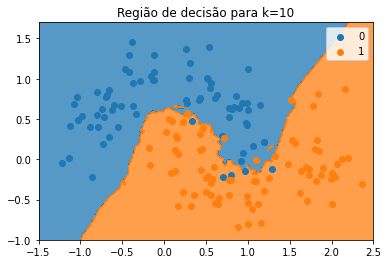

In [17]:
from matplotlib.colors import ListedColormap

for k in range(1,11):
    classifier = KNN(k, X_train_moon, y_train_moon, euclidean)
    colors = ['tab:blue', 'tab:orange']
    X_set, y_set = X_train_moon, y_train_moon
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap((colors)))
    plt.xlim(-1.5, 2.5)
    plt.ylim(-1, 1.7)
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap((colors))(i), label = j)
    plt.title(f'Região de decisão para k={k}')
    plt.legend()
    plt.show()

Conforme o valor de $k$ aumenta, é visivel que as regiões de decisão ficam delimitadas de forma mais suave, dado que valores maiores de $k$ vão considerar mais pontos para aproximar.

# Exercícios de "papel e caneta"

**Exercício 1.** Como mencionado na nota de aula, é comum *normalizar* os dados antes de utilizar algoritmos de ML. Seja $\mathbf{x} \in \mathcal{X}$ um ponto arbirtrário do nosso conjunto de dados (antes de normalização). Deixe também que $\mathcal{V}_k(\mathbf{x})$ seja o conjunto dos $k$ vizinhos mais próximos de $\mathbf{x}$ dentre nossas observações. É possível que $\mathcal{V}_k(\mathbf{x})$ mude caso normalizemos os dados? Prove.

Sim, é possível que o conjunto de $k$ vetores mais próximos de $x$ mude após a normalização. Isso é devido à divisão no processo de normalização, dado que:

$$d_\text{Euc}(P,Q) = \sqrt{\sum_{i=1}^n (P_i-Q_i)^2} \\
d_\text{Euc}n(P,Q) = \sqrt{\sum_{i=1}^n \dfrac{(P_i-Q_i)^2}{\sigma_i^2}}$$

Caso $\sigma_i \neq \sigma_j$ para $i \neq j$, a normalização não irá preservar a distância. Por exemplo:

In [18]:
x = np.array([1,2,4,8])
y = np.array([10,20,80,40])

norma_x = np.linalg.norm(x)
norma_y = np.linalg.norm(y)

x_normalizado = x/norma_x
y_normalizado = y/norma_y

In [19]:
import pandas as pd
df = pd.DataFrame({'X':x, 'Y':y})
df

,X,Y
0,1,10
1,2,20
2,4,80
3,8,40


In [20]:
df_norm = pd.DataFrame({'X':x_normalizado, 'Y':y_normalizado})
df_norm

,X,Y
0,0.108465,0.108465
1,0.216930,0.216930
2,0.433861,0.867722
3,0.867722,0.433861


In [21]:
pontos = ['A', 'B', 'C', 'D']

In [22]:
df['Ponto'] = pontos
df

,X,Y,Ponto
0,1,10,A
1,2,20,B
2,4,80,C
3,8,40,D


In [23]:
df_norm['Ponto'] = pontos
df_norm

,X,Y,Ponto
0,0.108465,0.108465,A
1,0.216930,0.216930,B
2,0.433861,0.867722,C
3,0.867722,0.433861,D


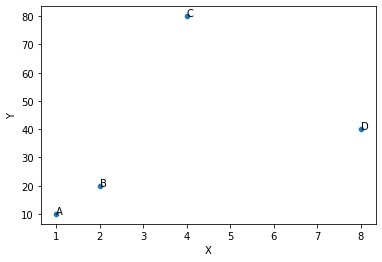

In [24]:
sns.scatterplot(data=df, x="X", y="Y")
for i, ponto in enumerate (pontos):
    plt.text(x[i]+0.003, y[i] + 0.003, ponto)

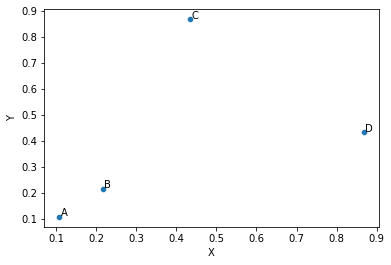

In [25]:
sns.scatterplot(data=df_norm, x="X", y="Y")
for i, ponto in enumerate (pontos):
    plt.text(x_normalizado[i]+0.003, y_normalizado[i] + 0.003, ponto)

In [26]:
for i in range(0,len(y)):
    for j in range(0,len(y)):
        if j > i:
            print(f"Distância entre P_{i} e P_{j}: {np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)}")

Distância entre P_0 e P_1: 10.04987562112089
Distância entre P_0 e P_2: 70.06425622241343
Distância entre P_0 e P_3: 30.805843601498726
Distância entre P_1 e P_2: 60.03332407921454
Distância entre P_1 e P_3: 20.8806130178211
Distância entre P_2 e P_3: 40.19950248448356


In [27]:
for i in range(0,len(y_normalizado)):
    for j in range(0,len(y_normalizado)):
        if j > i:
            print(f"Distância entre P_{i} e P_{j}: {np.sqrt((x_normalizado[i]-x_normalizado[j])**2+(y_normalizado[i]-y_normalizado[j])**2)}")

Distância entre P_0 e P_1: 0.1533929977694741
Distância entre P_0 e P_2: 0.8260465732490333
Distância entre P_0 e P_3: 0.8260465732490333
Distância entre P_1 e P_2: 0.6859943405700354
Distância entre P_1 e P_3: 0.6859943405700354
Distância entre P_2 e P_3: 0.6135719910778964


Se compararmos $D$ com os demais antes e depois da normalização, veremos que antes, $D$ era mais próximo  de $B$ do que de $A$ e $C$. Após a normalização, $D$ ficou mais próximo de $C$ do que de $B$ e $A$.

Assim, se usássemos por exemplo $V_1(D)$ antes da normalização teríamos o ponto $B$ e após a normalização teríamos o ponto $C$.

**Exercício 2.** Suponha que estamos usando $k$-NN equipado com distância Mahalanobis $d_M$ (veja Eq. 3.5 das notas de aula). Suponha ainda que $\Sigma$ é a matrix de covariância real dos dados (i.e., do vetor aleatório $\mathbf{x} \sim \mathbb{P}_\mathbf{x}$), ao invés de uma estimativa baseada em amostras. Existe uma transformação $g$ tal que $d_M(a, b) = \|g(a) - g(b) \|_2$? Mostre a transformação e derive a matriz de covariância de $z = g(\mathbf{x})$. 

Temos a seguinte fórmula para distância Mahalanobis:

$$d_M(x, z) = \sqrt{(x-z)^T\Sigma^{-1}(x-z)} \ , $$

onde $\Sigma$ é a matriz de covariância dos dados ($\Sigma = \dfrac{1}{N-1}\sum_{n=1}^N(x_n - \bar{x})(x_n-\bar{x})^T$; $\bar{x} = \dfrac{1}{N}\sum_{n=1}^Nx_n$)

Já que $\Sigma$ é definida positiva, $\Sigma^{-1}$ também vai ser. Fazendo a decomposição de Cholesky podemos escrever $\Sigma^{-1} = L^TL$, e então:

$$d_M(a, b) = \sqrt{(a-b)^T\Sigma^{-1}(a-b)} =  \\ 
= \sqrt{(a-b)^T(L^TL)(a-b)} = \sqrt{(a-b)^TL^TL(a-b)} = \\
= \sqrt{(L(a-b))^T(L(a-b))} = \|L(a-b)\|_2 = \|L(a-\mu)-L(b-\mu)\|_2 = \|g(a)-g(b)\|_2 \Rightarrow \\
\Rightarrow g(\mathbf{x}) = L(\mathbf{x}-\mu)$$

Ainda, já que $\Sigma^{-1} = L^TL \Rightarrow \Sigma^{-1} = L^2 \Rightarrow \Sigma^{-1/2} = L$, então podemos reescrever $g(\mathbf{x}) = \Sigma^{-1/2}(\mathbf{x}-\mu)$.

Sabemos por definição que, sendo matriz de covariância, $\Sigma = Cov(X) = E[(X-E(X))(X-E(X))^T]$. Agora, calculando a matriz de covariância de $z = g(x)$:
$$Cov(z) = E[\Sigma^{-1/2}(X-E(X))(X-E(X))^T\Sigma^{-1/2}] = \Sigma^{-1/2}E[(X-E(X))(X-E(X))^T]\Sigma^{-1/2} \Rightarrow \\
\Rightarrow Cov(z) =  \Sigma^{-1/2} \Sigma \Sigma^{-1/2} = I$$

Tendo isso, encontramos que a matriz de covariância de $z = g(\mathbf{x})$ é a matriz identidade.

Dado que $\Sigma$ é positiva definida, então a distribuição $\mathbb{P}_\mathbf{x}$ deve ser não-degenerada, ou seja, não tem uma probabilidade constante igual a 1. Um exemplo de distribuição degenerada seria um dado com um lado mais pesado que os demais, logo a probabilidade de cair nesse lado será sempre de 100% (https://encyclopediaofmath.org/wiki/Covariance_matrix, https://www.statisticshowto.com/degenerate-distribution/). Além disso, caso tenhamos menos observações do que dimensões, não existem dados suficientes para computar uma matriz de covariância completa, e portanto $\Sigma$ é singular, logo não é positiva definida e $\Sigma^{-1}$ não existe (https://stats.stackexchange.com/questions/49826/what-to-do-when-sample-covariance-matrix-is-not-invertible?rq=1). 